# Doctor consultation fee

## Data Description

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

Size of training set: 5961 records

Size of test set: 1987 records

## Importing modules

In [387]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [388]:
df_train = pd.read_excel('doctor_fee_train.xlsx')

In [389]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


## EDA

### Checking for null values 

In [391]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [392]:
round(df_train.isnull().sum()/len(df_train)*100, 2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

There are 55.39% in Rating, 0.42% in Place and 43.95% in Miscellaneous, null values present.

### Converting the qualification column into categorical

In [393]:
df_train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [394]:
df_train['Qualification'].value_counts()

BDS                                                                                                                   488
BHMS                                                                                                                  477
BAMS                                                                                                                  471
MBBS                                                                                                                  334
MBBS, MS - ENT                                                                                                        220
                                                                                                                     ... 
MBBS, Diploma in Public Health                                                                                          1
MBBS, Postgraduate Diploma Clinical Cardiology (PGDCC), Master of Health Sciences (MHSc), MRCP (UK), MD - Medicine      1
BDS, MDS - Orthodontics,

Here there are lot of Qualification but most of doctors only has 1 or 2 qualification.

And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category so here we will take the top 10 Qualification that occurs the most.

In [395]:
# Counting how many number of each qualifications are there and saving it into a dictionary with keys(qualification name)
# and values(how many these qualifications are present)

df_train["Qualification"]=df_train["Qualification"].str.split(",")
Qualification ={}
for i in df_train["Qualification"].values:
    for x in i:
        x = x.strip()
        if x in Qualification:
            Qualification[x]+=1
        else:
            Qualification[x]=1
            
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [396]:
#Extracting top 10 qualification

top_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in top_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [397]:
# extracted top 10 qualification into train dataset as new column.

for qual in final_qual:
    df_train[qual] = 0

for x,y in zip(df_train['Qualification'].values, np.array([i for i in range(len(df_train))])):
    for i in x:
        i = i.strip()
        if i in final_qual:
            df_train[i][y] = 1

In [398]:
df_train.drop('Qualification', axis=1, inplace=True)

### converting experience column

In [399]:
df_train['Experience']

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
5956    19 years experience
5957    33 years experience
5958    41 years experience
5959    15 years experience
5960    17 years experience
Name: Experience, Length: 5961, dtype: object

As we can see here, the experience column contain number of experience with string(years experience). We will remove the string value and leave the number of experience only.

In [400]:
df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype(int)

### Treating rating column

In [401]:
df_train['Rating']

0       100%
1        98%
2        NaN
3        NaN
4       100%
        ... 
5956     98%
5957     NaN
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

First we have to fill missing values with -99% to provide them different importance.

In [402]:
df_train['Rating'].fillna('-99%',inplace=True)

Now we have to remove % sign

In [403]:
df_train['Rating'] = df_train['Rating'].str.slice(stop=-1).astype(int)

Now we will create bins for these columns

In [404]:
bins = [-99, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [405]:
df_train['Rating'] = pd.cut(df_train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [406]:
df_train['Rating'].value_counts()

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
3        0
2        0
Name: Rating, dtype: int64

### Treating Place column 

In [407]:
df_train['Place'].value_counts()

HSR Layout, Bangalore               75
Andheri West, Mumbai                70
Dwarka, Delhi                       67
Banjara Hills, Hyderabad            64
Mulund West, Mumbai                 54
                                    ..
Baghlingampally, Hyderabad           1
Vileparle, Mumbai                    1
Inder Puri, Delhi                    1
Ullal Upanagara, Bangalore           1
Palkulangara, Thiruvananthapuram     1
Name: Place, Length: 877, dtype: int64

In [408]:
df_train['Place'].fillna('Unknown,Unknown', inplace=True)

Now we have consider only the city names in place column

In [409]:
df_train['City'] = df_train['Place'].str.split(",").str[1]

In [410]:
# now we can drop place column
df_train.drop('Place', axis=1, inplace=True)

In [411]:
df_train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: City, dtype: int64

In [412]:
df_train['City'] == ' Ernakulam'

0        True
1       False
2       False
3       False
4       False
        ...  
5956    False
5957    False
5958    False
5959    False
5960    False
Name: City, Length: 5961, dtype: bool

A white space is present befor the city name, we have to remove it

In [413]:
df_train['City'] = df_train['City'].str.strip()

Now we have to convert it using one-hot encoding.

In [414]:
city = pd.get_dummies(df_train['City'])
city

,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram,Unknown
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,0
5957,0,1,0,0,0,0,0,0,0,0
5958,0,0,0,1,0,0,0,0,0,0
5959,0,0,0,0,0,0,1,0,0,0


In [415]:
merged = pd.concat([df_train, city], axis='columns')
merged.drop('City', axis=1, inplace=True)

### Treating profile column

In [416]:
merged['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [417]:
profile = pd.get_dummies(merged['Profile'])
profile

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5956,0,0,0,1,0,0
5957,0,0,0,0,1,0
5958,0,0,0,0,1,0
5959,0,0,0,0,1,0


In [418]:
final_df_train = pd.concat([merged, profile], axis='columns')
final_df_train.drop('Profile', axis=1, inplace=True)

### Treating Miscellenious column

In [419]:
final_df_train['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
                                                                                        ..
93% 147 Feedback HSR Layout, Bangalore                                                   1
dental implants RCT - Root Canal Treatment Crowns and Bridge                             1
57% 5 Feedback Dilsukhnagar, Hyderabad                                                   1
86% 8 Feedback Rajajinagar, Bangalore                                                    1
97% 14 Feedback Kadavanthra, Ernakulam                                                   1

We can drop this columns as it is too much messy and the information that it give is already present in our dataset.

In [420]:
final_df_train.drop('Miscellaneous_Info', axis=1, inplace=True)

## Importing modules

In [422]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model Buiding

In [423]:
x = final_df_train.drop('Fees', axis=1)

In [424]:
y = final_df_train['Fees']

In [425]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [463]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Elastic Net', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

low_rmse = 0
for name, model in models:
    model.fit(x_train, y_train)
    predi = model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, predi)
    mae = metrics.mean_absolute_error(y_test, predi)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predi))
    print("{}: MSE is {:.2f}, RMSE is {:.2f} and MAE is {:.2f}".format(name, mse, rmse, mae))
    low_rmse = rmse
    if rmse < low_rmse:
        low_rmse = rmse
print("The best model is {} with the lowest RMSE value {:.2f}".format(name, low_rmse))        

Linear Regression: MSE is 28607.00, RMSE is 169.14 and MAE is 135.93
LASSO: MSE is 28953.89, RMSE is 170.16 and MAE is 137.75
Elastic Net: MSE is 30834.02, RMSE is 175.60 and MAE is 144.60
KNN: MSE is 33335.45, RMSE is 182.58 and MAE is 143.49
Decision Tree: MSE is 49345.10, RMSE is 222.14 and MAE is 163.71
Gradient Boosting: MSE is 28110.65, RMSE is 167.66 and MAE is 134.28
The best model is Gradient Boosting with the lowest RMSE value 167.66


Here we can see that the Gradient Boosting performs well as it has the minimum RMSE value.

### Checking cross validation score

In [465]:
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    low_rmse = rmse
    if rmse < low_rmse:
        low_rmse = rmse
print("The best model is {} with the lowest RMSE value {:.2f}".format(name, low_rmse)) 

Linear Regression: -175.05814681249979
LASSO: -176.06428119714548
Elastic Net: -181.90688762975304
KNN: -187.58361810251284
Decision Tree: -224.64906269042316
Gradient Boosting: -173.19070397603977
The best model is Gradient Boosting with the lowest RMSE value 167.66


Here also our Gradient Boosting perrforms well

### Hyperparameter tuning

In [469]:
# creating parameter list to pass in Grid Search CV

parameters = {'max_depth': np.arange(2,5),
             'learning_rate': [0.01,0.1],
             'loss': ['ls','lad','huber','quantile'],
             'criterion': ['friedman_mse','mse','mae']}

In [470]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': array([2, 3, 4])})

In [471]:
# getting best parameters 

GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3}

RMSE: 167.6631769000031


Text(0, 0.5, 'Predcited Values')

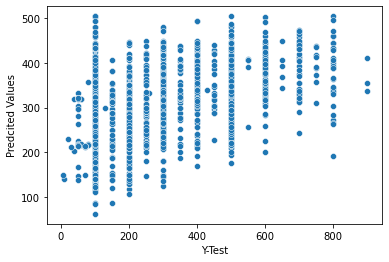

In [478]:
# Building the model with best parameter.

mod = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.1, loss='ls', max_depth=3)
prediction = mod.predict(x_test)
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
sns.scatterplot(y_test, prediction)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

## Saving our model 

In [482]:
import joblib
joblib.dump(mod, 'doctor.pkl')

['doctor.pkl']

## Loading the saved model

In [483]:
save = joblib.load('doctor.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 134.29211789375097
Mean Squared Error: 28110.94088820173
Root Mean Squared Error: 167.6631769000031


In [484]:
prediction

array([314.63701756, 354.50624397, 333.51964897, ..., 407.05199394,
       311.32430688, 219.84910906])